In [1]:
import numpy as np
from pylab import imshow, show, savefig, cm
import matplotlib.pylab as plt
from sklearn.preprocessing import StandardScaler
from itertools import combinations_with_replacement

In [2]:
POLYNOMIAL_ORDER = 2
TOP_EIGENVECTORS = 40

In [3]:
def showDigit(image):
    imshow(image)
    show()

In [4]:
FILES_DIR = '.\\MNIST_Data\\'
TRAIN_FILE = 'train-images.idx3-ubyte'
TRAIN_LABEL = 'train-labels-idx1-ubyte'
TEST_FILE = 't10k-images-idx3-ubyte'
TEST_LABEL = 't10k-labels-idx1-ubyte'

In [5]:
with open(FILES_DIR + TRAIN_FILE,'rb') as ftemp:
    datatemp = np.fromfile(ftemp, dtype = np.ubyte)
    trainingData=datatemp[16::].reshape(60000,784)
    print('Size of the training set: ',trainingData.shape)
    
with open(FILES_DIR + TRAIN_LABEL,'rb') as ftemp:
    datatemp = np.fromfile(ftemp, dtype = np.ubyte)
    trainingLabels=datatemp[8::]
    print('Size of the training labels: ',trainingLabels.shape)

with open(FILES_DIR + TEST_FILE) as ftemp:
    datatemp = np.fromfile(ftemp, dtype = np.ubyte)
    testData=datatemp[16::].reshape(10000,784)
    print('Size of the test set: ',testData.shape)

with open(FILES_DIR + TEST_LABEL,'rb') as ftemp:
    datatemp = np.fromfile(ftemp, dtype = np.ubyte)
    testLabels=datatemp[8::]
    print('Size of the test labels: ',testLabels.shape)

Size of the training set:  (60000, 784)
Size of the training labels:  (60000,)
Size of the test set:  (10000, 784)
Size of the test labels:  (10000,)


In [6]:
def covarianceMatrix(trainingData):
    trainingStd = StandardScaler().fit_transform(trainingData)
    trainingMean = np.mean(trainingStd, axis=0)
    covMatx = np.cov(trainingStd.T)    
    return covMatx

covMatx = covarianceMatrix(trainingData)

In [7]:
eigenVals, eigenVecs = np.linalg.eig(covMatx)

print ("Eigenvals shape: " + str(eigenVals.shape))
print ("Eigenvecs shape: " + str(eigenVecs.shape))

Eigenvals shape: (784,)
Eigenvecs shape: (784, 784)


In [8]:
eigenValVec = [(np.abs(eigenVals[i]), eigenVecs[:,i]) for i in range(len(eigenVals))]
eigenValVec = sorted(eigenValVec, reverse=True, key=lambda x:x[0])

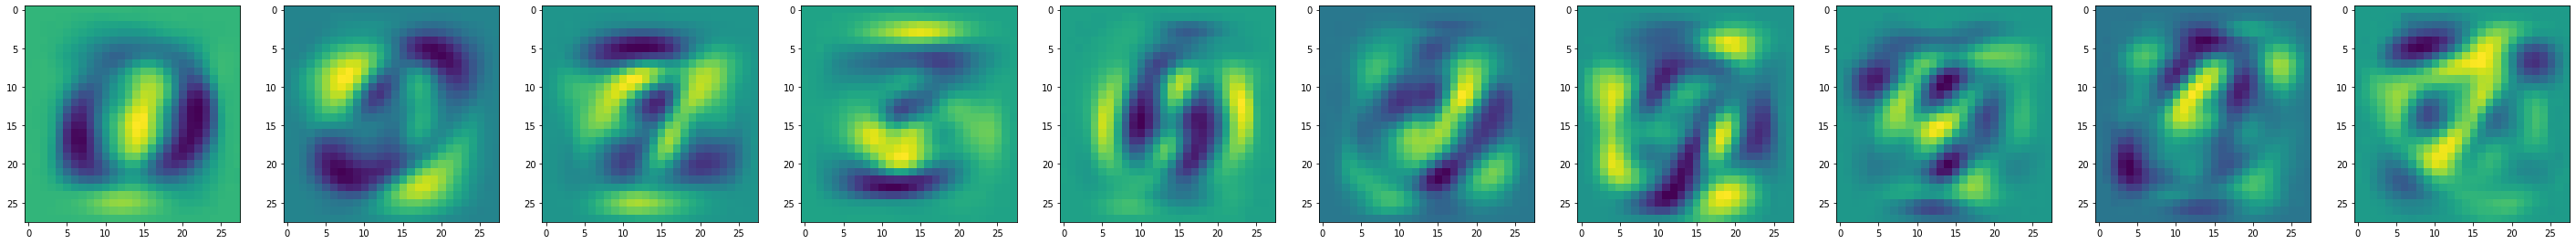

In [9]:
f,ax = plt.subplots(1,10,figsize=(50,50))
for i in range(10):
    ax[i].imshow(eigenValVec[i][1].reshape(28,28))
plt.show()

In [10]:
trainDigitList = np.arange(2,21,2)

In [11]:
trainDigitList

array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20])

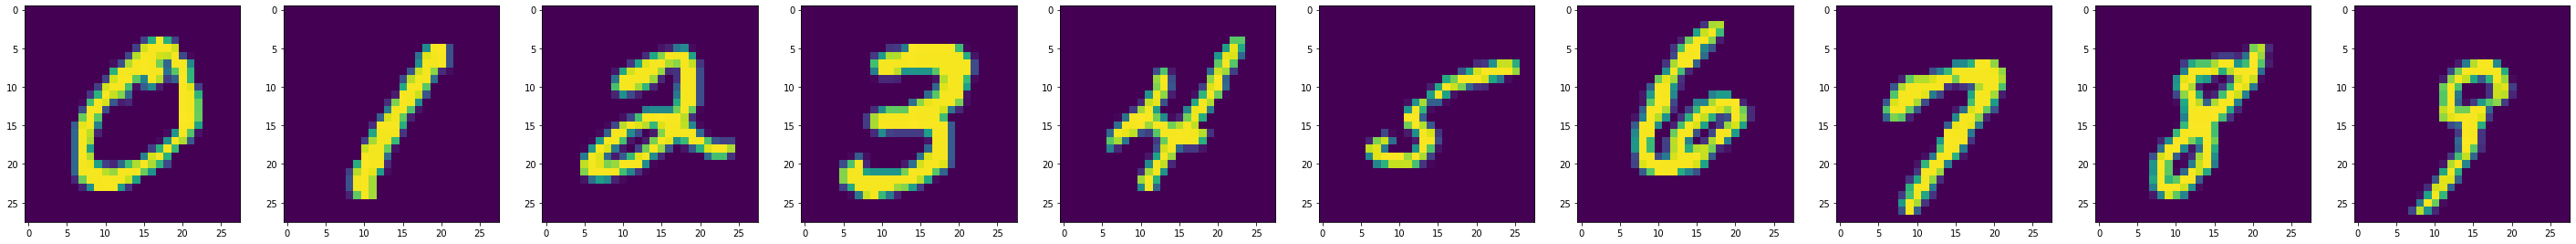

In [12]:
f,ax = plt.subplots(1,10,figsize=(50,50))
for idx,digit in enumerate(trainDigitList):
    ax[idx].imshow(trainingData[digit-1].reshape(28,28))
plt.show()

In [13]:
testDigitList = np.asarray([4, 3, 2, 19, 5, 9, 12, 1, 62, 8])

In [14]:
testDigitList

array([ 4,  3,  2, 19,  5,  9, 12,  1, 62,  8])

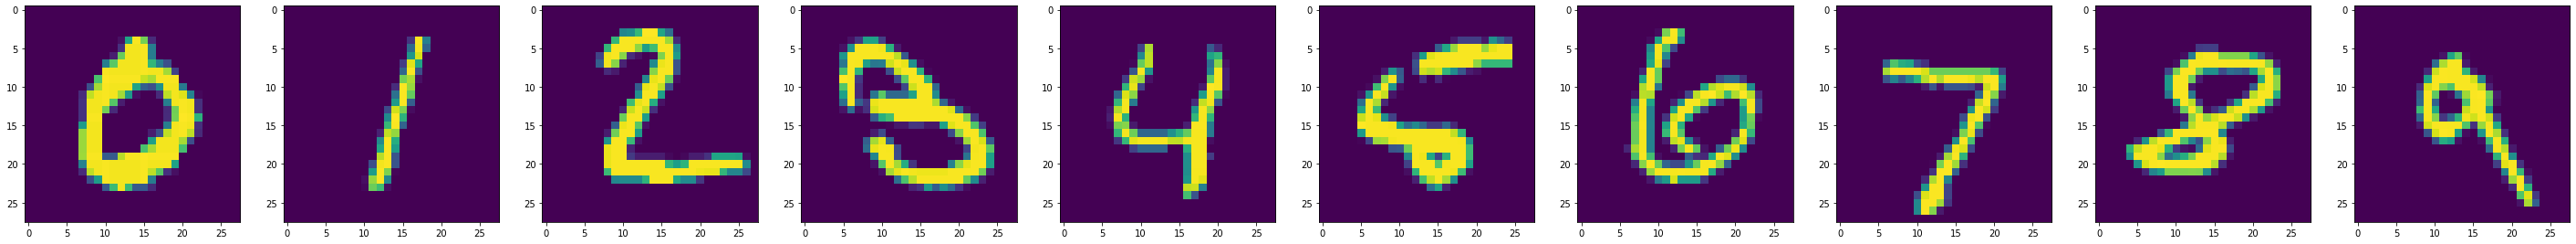

In [15]:
f,ax = plt.subplots(1,10,figsize=(50,50))
for idx,digit in enumerate(testDigitList):
    ax[idx].imshow(testData[digit-1].reshape(28,28))
plt.show()

In [16]:
reconstructedTestDigits = []

In [17]:
for idx, digit in enumerate(testDigitList):
    lambdas = []
    for i in range(TOP_EIGENVECTORS):
        lambdas.append(testData[digit-1].T.dot(eigenValVec[i][1]))
    digitNew = np.zeros(784)
    for i in range(TOP_EIGENVECTORS):
        digitNew += lambdas[i]*eigenValVec[i][1]
    reconstructedTestDigits.append(digitNew)

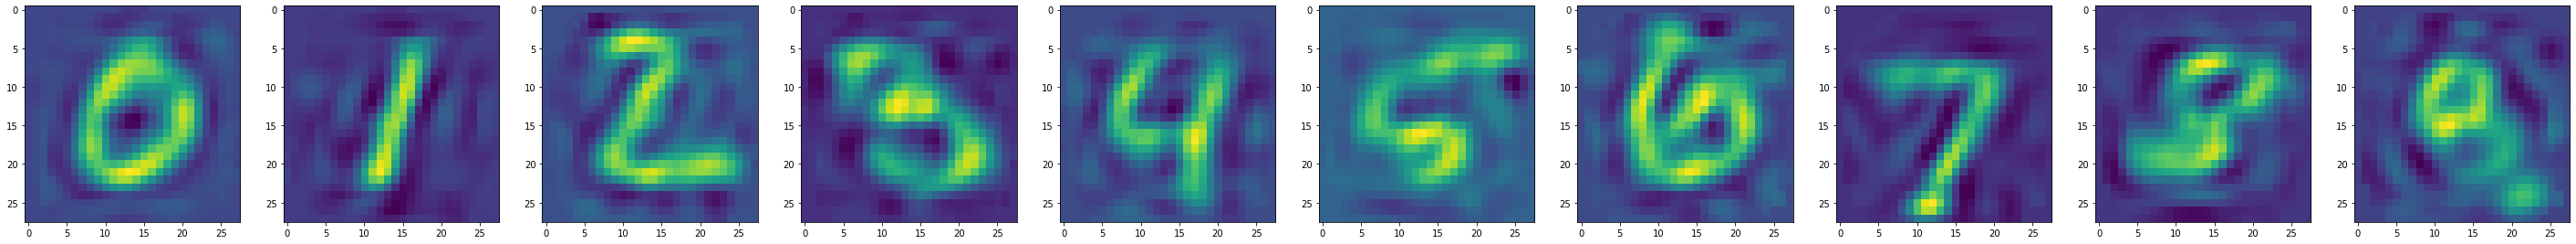

In [18]:
f,ax = plt.subplots(1,10,figsize=(50,50))
for idx in range(10):
    ax[idx].imshow(reconstructedTestDigits[idx].reshape(28,28))
plt.show()

# Subtract  the Mean from Training set

In [19]:
trainingStd = StandardScaler().fit_transform(trainingData)
trainingMean = np.mean(trainingStd, axis=0)

In [20]:
normedTrain = np.subtract(trainingStd,trainingMean)

In [21]:
eigenValVec[0][1].shape

(784,)

In [22]:
for idx, digit in enumerate(normedTrain):
    lambdas = []
    for i in range(TOP_EIGENVECTORS):
        lambdas.append(normedTrain[idx].T.dot(eigenValVec[i][1]))
    digitNew = np.zeros(784)
    for i in range(TOP_EIGENVECTORS):
        digitNew += lambdas[i]*eigenValVec[i][1]
    normedTrain[idx] = digitNew

In [23]:
sortedNormedTrain = []
for i in range(0,60000,1):
    sortedNormedTrain += (normedTrain[trainingLabels==i].tolist())

In [24]:
sortedTrainLabels = np.sort(trainingLabels)

In [25]:
sortedNormedTrain = np.asarray(sortedNormedTrain)
sortedNormedTrain.shape

(60000, 784)

In [26]:
top30EigenVecs = []
for i in range(TOP_EIGENVECTORS):
    top30EigenVecs.append(eigenValVec[i][1])
top30EigenVecs = np.asarray(top30EigenVecs)
top30EigenVecs.shape

(40, 784)

In [27]:
initY = np.dot(sortedNormedTrain,top30EigenVecs.T)

In [28]:
initY.shape

(60000, 40)

# Append ones to Y (normalized sorted matrix)

In [29]:
Y = np.append(initY,np.ones(60000,dtype=int).reshape(60000,1),axis=1)

In [30]:
Y.shape

(60000, 41)

# One hot encoded B Matrix

In [31]:
a = np.asarray(sortedTrainLabels)
B = np.zeros((a.size, a.max()+1))
B[np.arange(a.size),a] = 1

In [32]:
B.shape

(60000, 10)

# Calculate Matrix A

In [33]:
pY = np.linalg.pinv(Y)

In [34]:
A = pY.dot(B)

In [35]:
A.shape

(41, 10)

In [36]:
AT = A.T

In [37]:
predictedLabel = []
for j in range(60000):
    result = []
    for i in range(10):
        result.append(AT[i].T.dot(Y[j]))
    predictedLabel.append(result.index(max(result))) 
predictedLabels = np.asarray(predictedLabel)

In [38]:
accuratePredictions = np.sum(sortedTrainLabels==predictedLabels)

In [39]:
trainAccuracy = (accuratePredictions/60000)*100

In [40]:
trainAccuracy

82.62166666666667

# Linear regression with test set

In [41]:
trainingStd = StandardScaler().fit_transform(trainingData)
trainingMean = np.mean(trainingStd, axis=0)
testStd = StandardScaler().fit_transform(testData)

In [42]:
normedTest = np.subtract(testStd,trainingMean)

In [43]:
for idx, digit in enumerate(normedTest):
    lambdas = []
    for i in range(TOP_EIGENVECTORS):
        lambdas.append(normedTest[idx].T.dot(eigenValVec[i][1]))
    digitNew = np.zeros(784)
    for i in range(TOP_EIGENVECTORS):
        digitNew += lambdas[i]*eigenValVec[i][1]
    normedTest[idx] = digitNew

In [44]:
shortedTest = np.dot(normedTest,top30EigenVecs.T)
shortedTest.shape

(10000, 40)

In [45]:
normedTest = np.append(shortedTest,np.ones(10000,dtype=int).reshape(10000,1),axis=1)

In [46]:
predictedLabel = []
for j in range(10000):
    result = []
    for i in range(10):
        result.append(AT[i].T.dot(normedTest[j]))
    predictedLabel.append(result.index(max(result))) 
predictedLabels = np.asarray(predictedLabel)

In [47]:
accuratePredictions = np.sum(testLabels==predictedLabels)

In [48]:
testAccuracy = (accuratePredictions/10000)*100

In [49]:
testAccuracy

83.22

# Polynomial Regression with Training Set

In [50]:
newY = []
for y in (Y):
    combinations = np.asarray(list(combinations_with_replacement(y,POLYNOMIAL_ORDER)))
    prodCombinations = np.prod(combinations,axis=1)
    newY.append(prodCombinations)    
newY = np.asarray(newY)

In [51]:
newY.shape

(60000, 861)

In [52]:
pY = np.linalg.pinv(newY)

In [53]:
A = pY.dot(B)

In [54]:
A.shape

(861, 10)

In [55]:
AT = A.T

In [56]:
predictedLabel = []
for j in range(60000):
    result = []
    for i in range(10):
        result.append(AT[i].T.dot(newY[j]))
    predictedLabel.append(result.index(max(result))) 
predictedLabels = np.asarray(predictedLabel)

In [57]:
accuratePredictions = np.sum(sortedTrainLabels==predictedLabels)

In [58]:
trainAccuracy = (accuratePredictions/60000)*100

In [59]:
trainAccuracy

95.325

# Polynomial regression with test set

In [60]:
newNormedTest = []
for y in (normedTest):
    combinations = np.asarray(list(combinations_with_replacement(y,POLYNOMIAL_ORDER)))
    prodCombinations = np.prod(combinations,axis=1)
    newNormedTest.append(prodCombinations)    
newNormedTest = np.asarray(newNormedTest)

newNormedTest.shape

(10000, 861)

In [61]:
predictedLabel = []
for j in range(10000):
    result = []
    for i in range(10):
        result.append(AT[i].T.dot(newNormedTest[j]))
    predictedLabel.append(result.index(max(result))) 
predictedLabels = np.asarray(predictedLabel)

In [62]:
accuratePredictions = np.sum(testLabels==predictedLabels)

In [63]:
trainAccuracy = (accuratePredictions/10000)*100

In [64]:
trainAccuracy

94.95